In [2]:
from google.colab import files
uploaded = files.upload()


Saving synthetic_hashtag_counts.csv to synthetic_hashtag_counts.csv


In [3]:
# prompt: import pandas as pd
# df = pd.read_csv('synthetic_hashtag_counts.csv', index_col=0, parse_dates=True)
# print(df.head())

import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['synthetic_hashtag_counts.csv']), index_col=0, parse_dates=True)
print(df.head())

            mentalhealth    fitness     travel       food  motivation
2024-01-01     95.062217  86.058238  48.076151  74.932860  179.212456
2024-01-02    110.025189  57.634366  68.885170  85.928295  183.303090
2024-01-03    110.281383  74.270576  48.489600  82.839240  190.479079
2024-01-04    118.250232  72.590908  56.399471  80.040718  187.471645
2024-01-05    102.989366  82.339241  78.450049  82.839208  188.156297


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
df.to_csv('/content/drive/MyDrive/synthetic_hashtag_counts.csv')


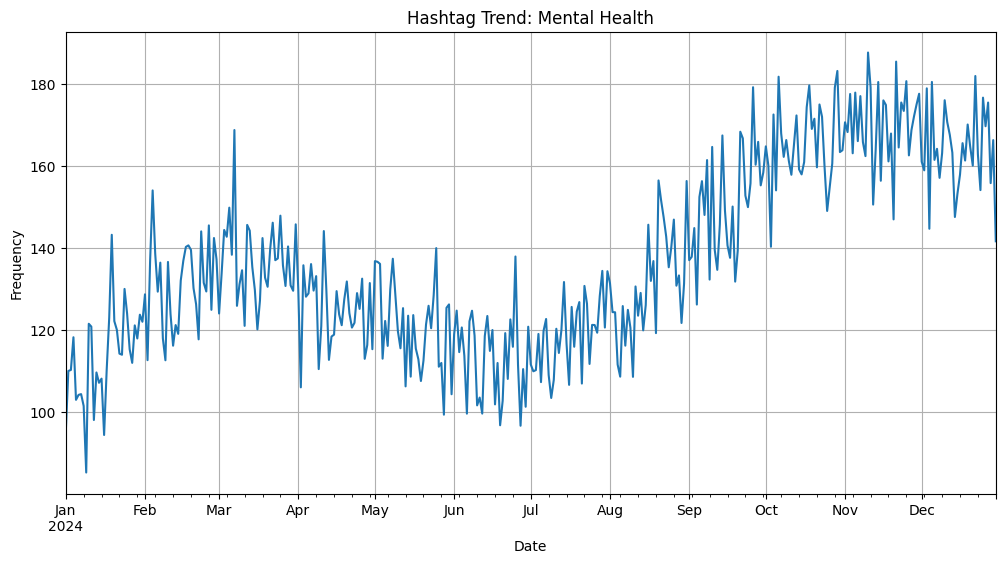

In [6]:
import matplotlib.pyplot as plt

df['mentalhealth'].plot(figsize=(12,6), title='Hashtag Trend: Mental Health')
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [7]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Select one hashtag time series
data = df['mentalhealth'].values.reshape(-1, 1)

# Normalize between 0 and 1
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


In [8]:
SEQ_LENGTH = 7  # number of past days to look at

def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])  # 7 din ka sequence
        y.append(data[i+seq_length])    # 8th din ka value
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled, SEQ_LENGTH)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (358, 7, 1)
y shape: (358, 1)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # time-series me shuffle nahi karte!
)

print("Train size:", X_train.shape, y_train.shape)
print("Test size:", X_test.shape, y_test.shape)


Train size: (286, 7, 1) (286, 1)
Test size: (72, 7, 1) (72, 1)


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=64, activation='tanh', input_shape=(SEQ_LENGTH, 1)))
model.add(Dense(1))  # output: predicted value of next day

model.compile(optimizer='adam', loss='mse')  # MSE for regression
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1374 - val_loss: 0.0110
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0178 - val_loss: 0.0293
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0136 - val_loss: 0.0129
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0139 - val_loss: 0.0151
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0114 - val_loss: 0.0123
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0124 - val_loss: 0.0116
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0109 - val_loss: 0.0108
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0109 - val_loss: 0.0126
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0111 - val_loss: 0.0115
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0107 - val_loss: 0.0108
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0104 - val_loss: 0.0121
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0110 -

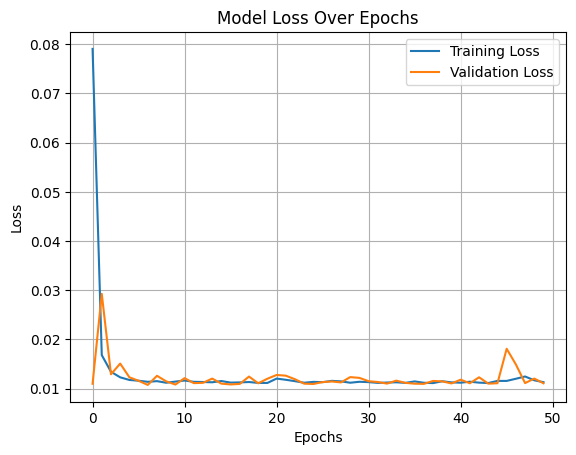

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
y_pred = model.predict(X_test)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


In [14]:
print(y_pred[:5])


[[0.8092609 ]
 [0.8139053 ]
 [0.80955154]
 [0.8302894 ]
 [0.84118825]]


In [15]:
y_pred_actual = scaler.inverse_transform(y_pred)


In [16]:
print(y_pred_actual[:5])


[[168.14444]
 [168.62007]
 [168.17421]
 [170.29799]
 [171.41414]]


In [17]:
y_test_actual = scaler.inverse_transform(y_test)

for i in range(5):
    print(f"Actual: {y_test_actual[i][0]:.2f} | Predicted: {y_pred_actual[i][0]:.2f}")


Actual: 171.53 | Predicted: 168.14
Actual: 159.69 | Predicted: 168.62
Actual: 175.01 | Predicted: 168.17
Actual: 172.00 | Predicted: 170.30
Actual: 159.61 | Predicted: 171.41


In [20]:
model.save("lstm_hashtag_model.keras")  # ✅ Modern format
from google.colab import files
files.download("lstm_hashtag_model.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>